In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
cifar10 = tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train,x_test  =  x_train/255.0,x_test/255.0

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6,(5,5),strides=1,padding='same'),
    tf.keras.layers.BatchNormalization(),#B
    tf.keras.layers.Activation(activation='relu'),
    tf.keras.layers.MaxPool2D((2,2),strides=2,padding='same'),
    tf.keras.layers.Dropout(0.2),                        
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax'),   
])

In [5]:
model.compile(optimizer='adam',
               loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics = ['acc'])

In [6]:
history = model.fit(x_train,y_train,
                    batch_size=32,
                    epochs=5,
                    validation_data = (x_test,y_test),
                    validation_freq=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 36s 726us/sample - loss: 1.5545 - acc: 0.4444 - val_loss: 1.3681 - val_acc: 0.5096
Epoch 2/5
50000/50000 [==============================] - 29s 582us/sample - loss: 1.2783 - acc: 0.5441 - val_loss: 1.3642 - val_acc: 0.5273
Epoch 3/5
50000/50000 [==============================] - 29s 578us/sample - loss: 1.1892 - acc: 0.5770 - val_loss: 1.2803 - val_acc: 0.5489
Epoch 4/5
50000/50000 [==============================] - 30s 592us/sample - loss: 1.1306 - acc: 0.5988 - val_loss: 1.2207 - val_acc: 0.5635
Epoch 5/5
50000/50000 [==============================] - 29s 582us/sample - loss: 1.0877 - acc: 0.6122 - val_loss: 1.1694 - val_acc: 0.5841


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  456       
_________________________________________________________________
batch_normalization (BatchNo multiple                  24        
_________________________________________________________________
activation (Activation)      multiple                  0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  1

In [8]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [9]:
loss =  history.history.get('loss')
val_loss =history.history.get('val_loss')

In [10]:
acc =  history.history.get('acc')
val_acc =history.history.get('val_acc')

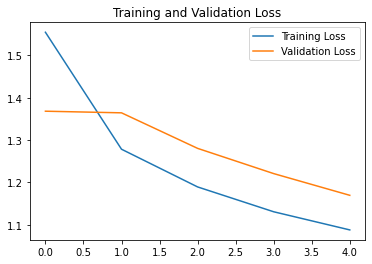

In [13]:
plt.plot(loss,label='Training Loss')
plt.plot(val_loss,label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [1]:
plt.plot(acc,label='Training acc')
plt.plot(val_acc,label='Validation acc')
plt.title('Training and Validation acc')
plt.legend()

NameError: name 'plt' is not defined